# importing Libraries

In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score
import seaborn as sns


# loading and reading dataset

In [37]:

df = pd.read_csv("Train_data.csv")
df_test= pd.read_csv("test_data.csv")
print(df.head())

    Glucose  Cholesterol  Hemoglobin  Platelets  White Blood Cells  \
0  0.739597     0.650198    0.713631   0.868491           0.687433   
1  0.121786     0.023058    0.944893   0.905372           0.507711   
2  0.452539     0.116135    0.544560   0.400640           0.294538   
3  0.136609     0.015605    0.419957   0.191487           0.081168   
4  0.176737     0.752220    0.971779   0.785286           0.443880   

   Red Blood Cells  Hematocrit  Mean Corpuscular Volume  \
0         0.529895    0.290006                 0.631045   
1         0.403033    0.164216                 0.307553   
2         0.382021    0.625267                 0.295122   
3         0.166214    0.073293                 0.668719   
4         0.439851    0.894991                 0.442159   

   Mean Corpuscular Hemoglobin  Mean Corpuscular Hemoglobin Concentration  \
0                     0.001328                                   0.795829   
1                     0.207938                                   0.505

# EDA

In [38]:
# shape of the data
df.shape

(2351, 25)

In [39]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [40]:
# describing the data
df.describe()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
count,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,...,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000,2351.000000
mean,0.362828,0.393648,0.586190,0.504027,0.511086,0.506590,0.507152,0.492200,0.484459,0.562273,...,0.374373,0.439112,0.421777,0.546079,0.434972,0.452138,0.582255,0.425075,0.454597,0.430308
std,0.251889,0.239449,0.271498,0.303347,0.277270,0.266565,0.285537,0.275735,0.315618,0.273281,...,0.256981,0.263779,0.252124,0.269511,0.267388,0.242075,0.250915,0.229298,0.251189,0.243034
min,0.010994,0.012139,0.003021,0.012594,0.010139,0.044565,0.011772,0.046942,0.000554,0.006947,...,0.005217,0.016256,0.033037,0.039505,0.007186,0.013013,0.114550,0.021239,0.007490,0.004867
25%,0.129198,0.195818,0.346092,0.200865,0.259467,0.263589,0.288132,0.287532,0.207938,0.355774,...,0.184604,0.188750,0.217757,0.307132,0.211078,0.239659,0.339125,0.213026,0.288961,0.196192
50%,0.351722,0.397083,0.609836,0.533962,0.527381,0.467431,0.493428,0.453052,0.420723,0.603635,...,0.317857,0.466375,0.413071,0.512941,0.373235,0.486317,0.610860,0.417295,0.426863,0.481601
75%,0.582278,0.582178,0.791215,0.754841,0.743164,0.743670,0.753657,0.722293,0.778160,0.741381,...,0.572330,0.652514,0.604753,0.779378,0.710319,0.616181,0.800666,0.606719,0.682164,0.631426
max,0.968460,0.905026,0.983306,0.999393,0.990786,1.000000,0.977520,0.995263,0.963235,0.975586,...,0.973679,0.950218,0.983826,0.989411,0.942549,0.994460,0.996873,0.925924,0.972803,0.797906


In [41]:

#column to list
df.columns.tolist()

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Creatinine',
 'Troponin',
 'C-reactive Protein',
 'Disease']

In [42]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [43]:
# check for missing values:
df.isnull().sum()

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [44]:
#checking duplicate values
df.nunique()

Glucose                                      65
Cholesterol                                  65
Hemoglobin                                   65
Platelets                                    65
White Blood Cells                            65
Red Blood Cells                              65
Hematocrit                                   65
Mean Corpuscular Volume                      65
Mean Corpuscular Hemoglobin                  65
Mean Corpuscular Hemoglobin Concentration    65
Insulin                                      65
BMI                                          65
Systolic Blood Pressure                      65
Diastolic Blood Pressure                     65
Triglycerides                                65
HbA1c                                        65
LDL Cholesterol                              65
HDL Cholesterol                              65
ALT                                          65
AST                                          65
Heart Rate                              

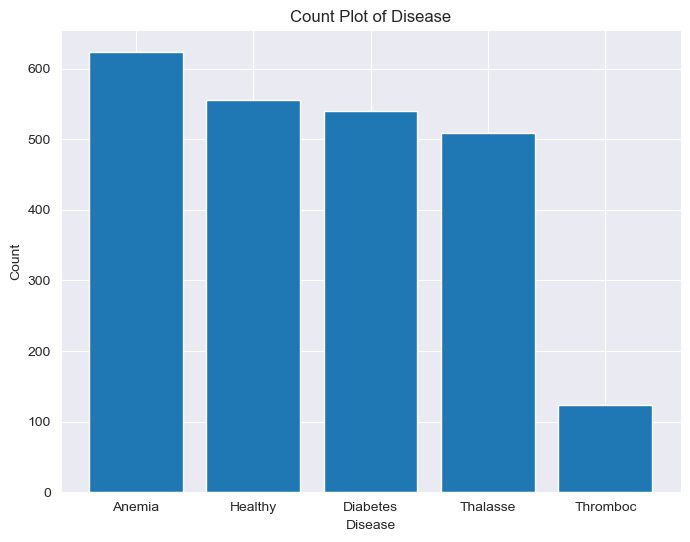

In [45]:

# Assuming 'df' is your DataFrame
quality_counts = df['Disease'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts,)
plt.title('Count Plot of Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

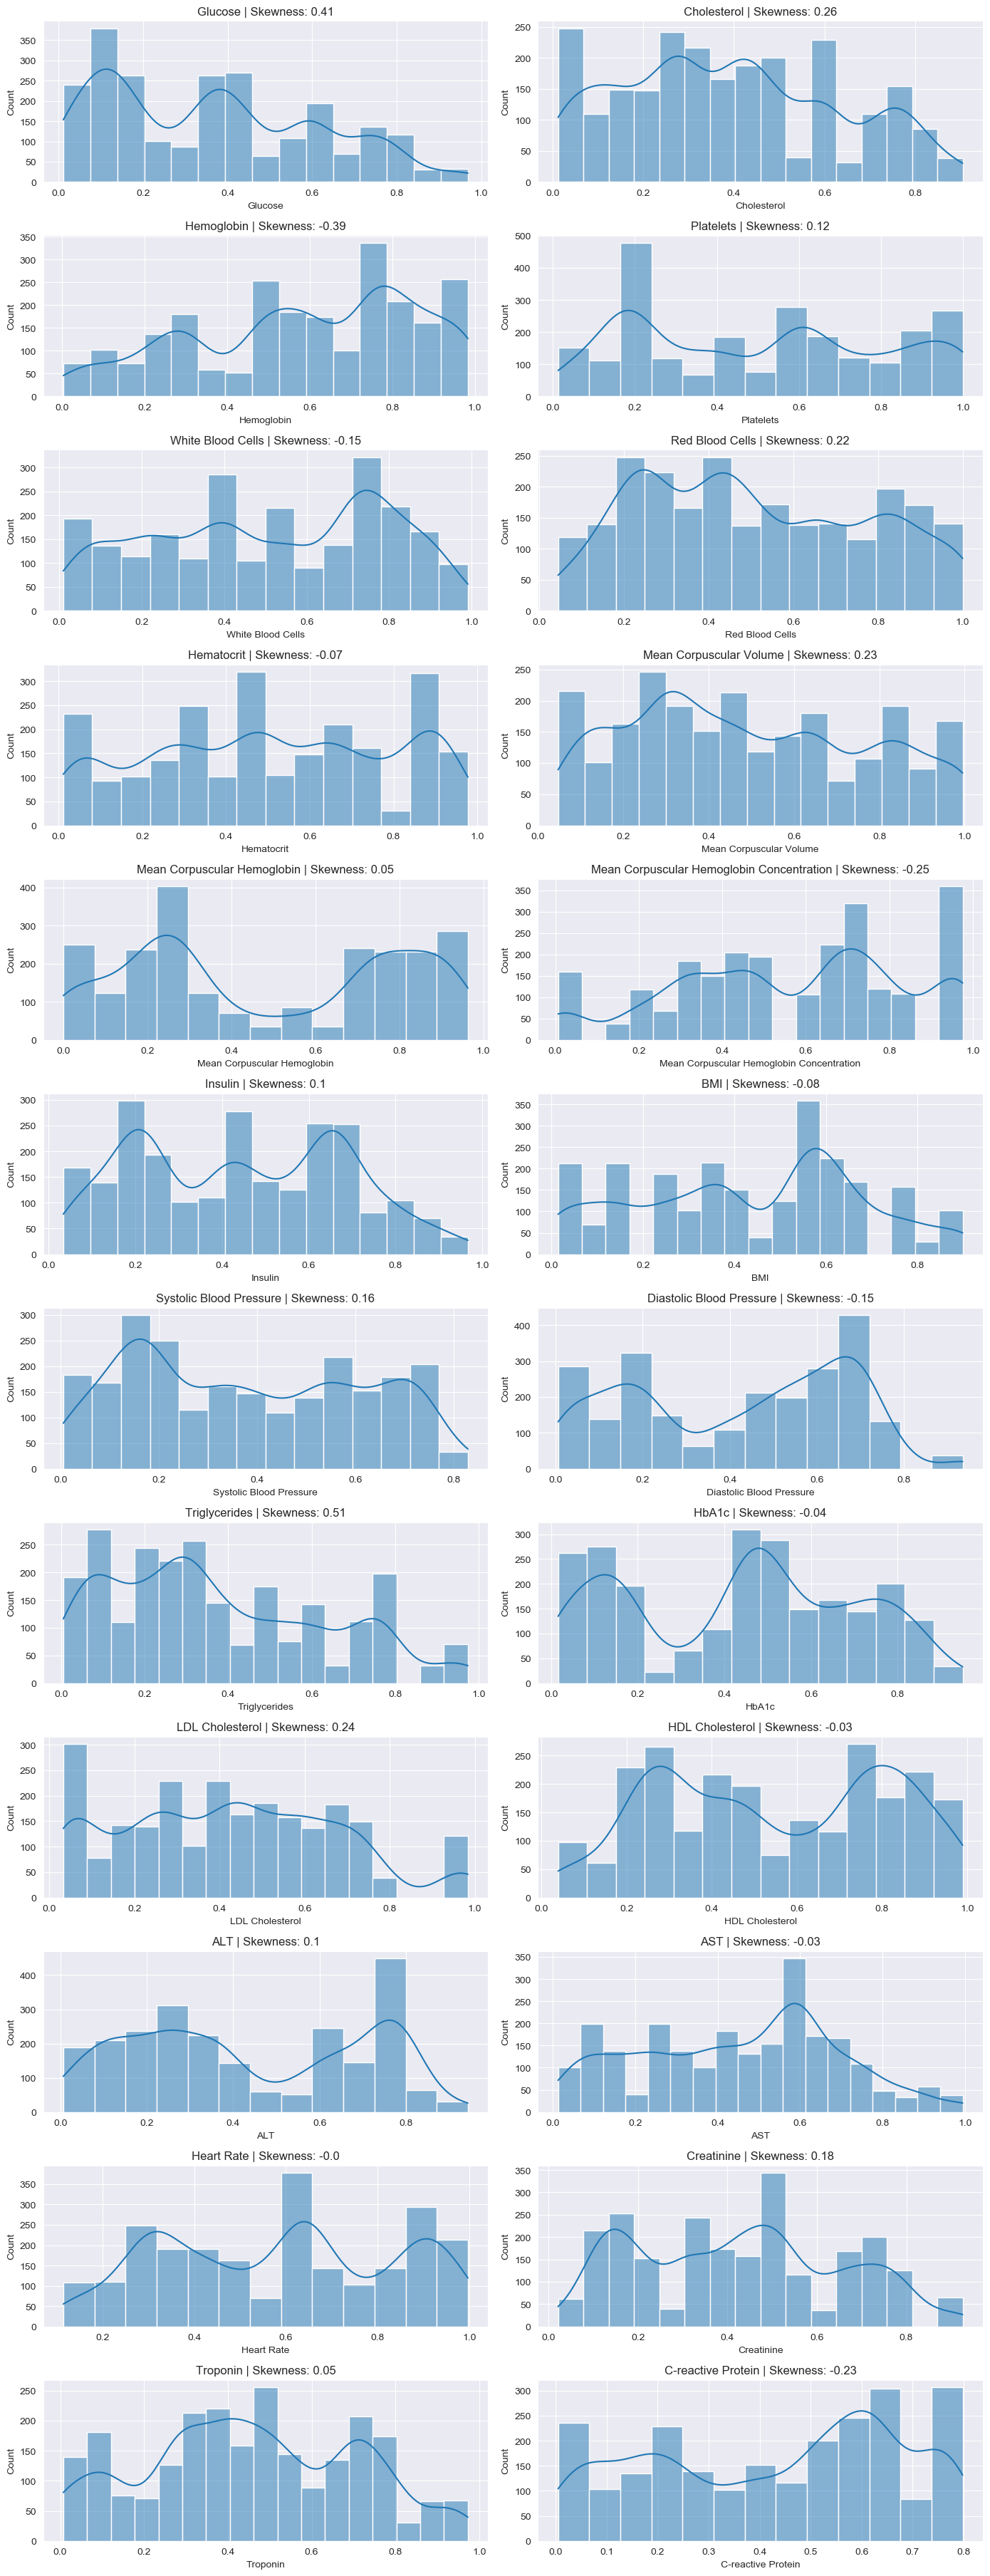

In [46]:


# Set Seaborn style
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# transform data

In [47]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.670665,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.491185,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.141738,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.570553,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes


In [48]:


# Define a custom encoding function
def encode_value(value):
    # Define the list of values and their corresponding encodings
    # value_encoding = {
    #     'Healthy': 0,
    #     'Diabetes': 1,
    #     'Thalasse': 2,
    #     'Anemia': 3,
    #     'Thromboc': 4
    # }
    value_encoding = {
        'Healthy': 0,
    }
    new_encoding = 1
    if value in value_encoding:
        return value_encoding[value]
    else:
        # If the value is not in the predefined list, assign a new encoding

        value_encoding[value] = new_encoding
        return new_encoding

df['eDisease'] = df['Disease'].apply(encode_value)



In [49]:
df['eDisease']

0       0
1       1
2       1
3       1
4       1
       ..
2346    1
2347    1
2348    1
2349    1
2350    1
Name: eDisease, Length: 2351, dtype: int64

In [50]:
df_test['eDisease'] = df_test['Disease'].apply(encode_value)

In [51]:
df_test['eDisease']

0      1
1      1
2      1
3      1
4      1
      ..
481    1
482    1
483    1
484    1
485    1
Name: eDisease, Length: 486, dtype: int64

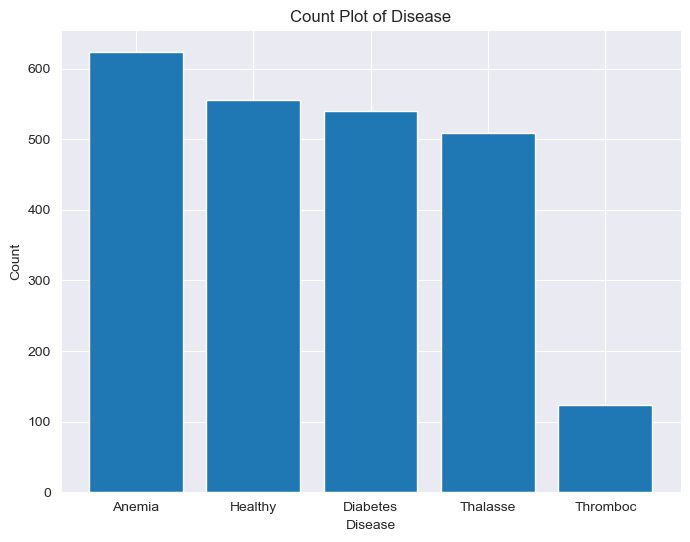

In [52]:

# Assuming 'df' is your DataFrame
quality_counts = df['Disease'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts,)
plt.title('Count Plot of Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

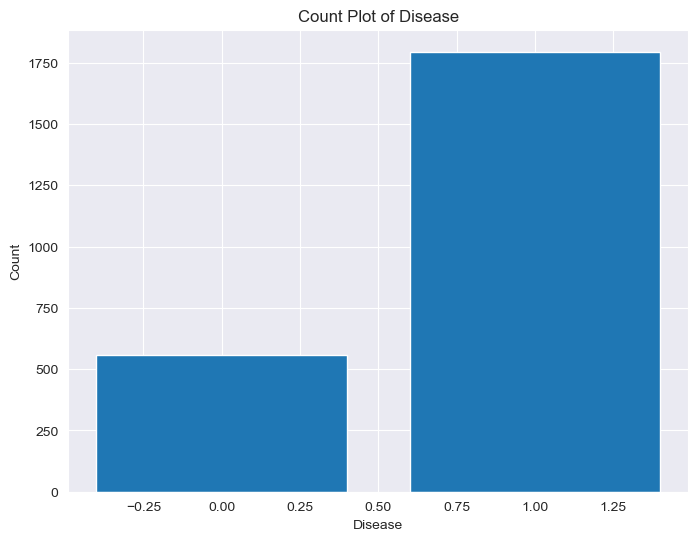

In [53]:

# Assuming 'df' is your DataFrame
quality_counts = df['eDisease'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts,)
plt.title('Count Plot of Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

In [54]:
df_test['eDisease'].unique()

array([1, 0], dtype=int64)

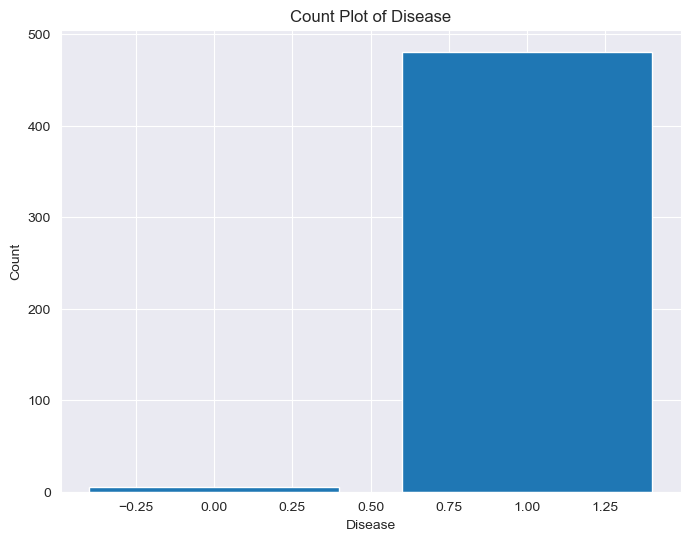

In [55]:

# Assuming 'df' is your DataFrame
quality_counts = df_test['eDisease'].value_counts()

# Using Matplotlib to create a count plot
plt.figure(figsize=(8, 6))
plt.bar(quality_counts.index, quality_counts,)
plt.title('Count Plot of Disease')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

In [56]:
df

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,eDisease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy,0
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse,1
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia,1
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes,1
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse,1
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia,1
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes,1


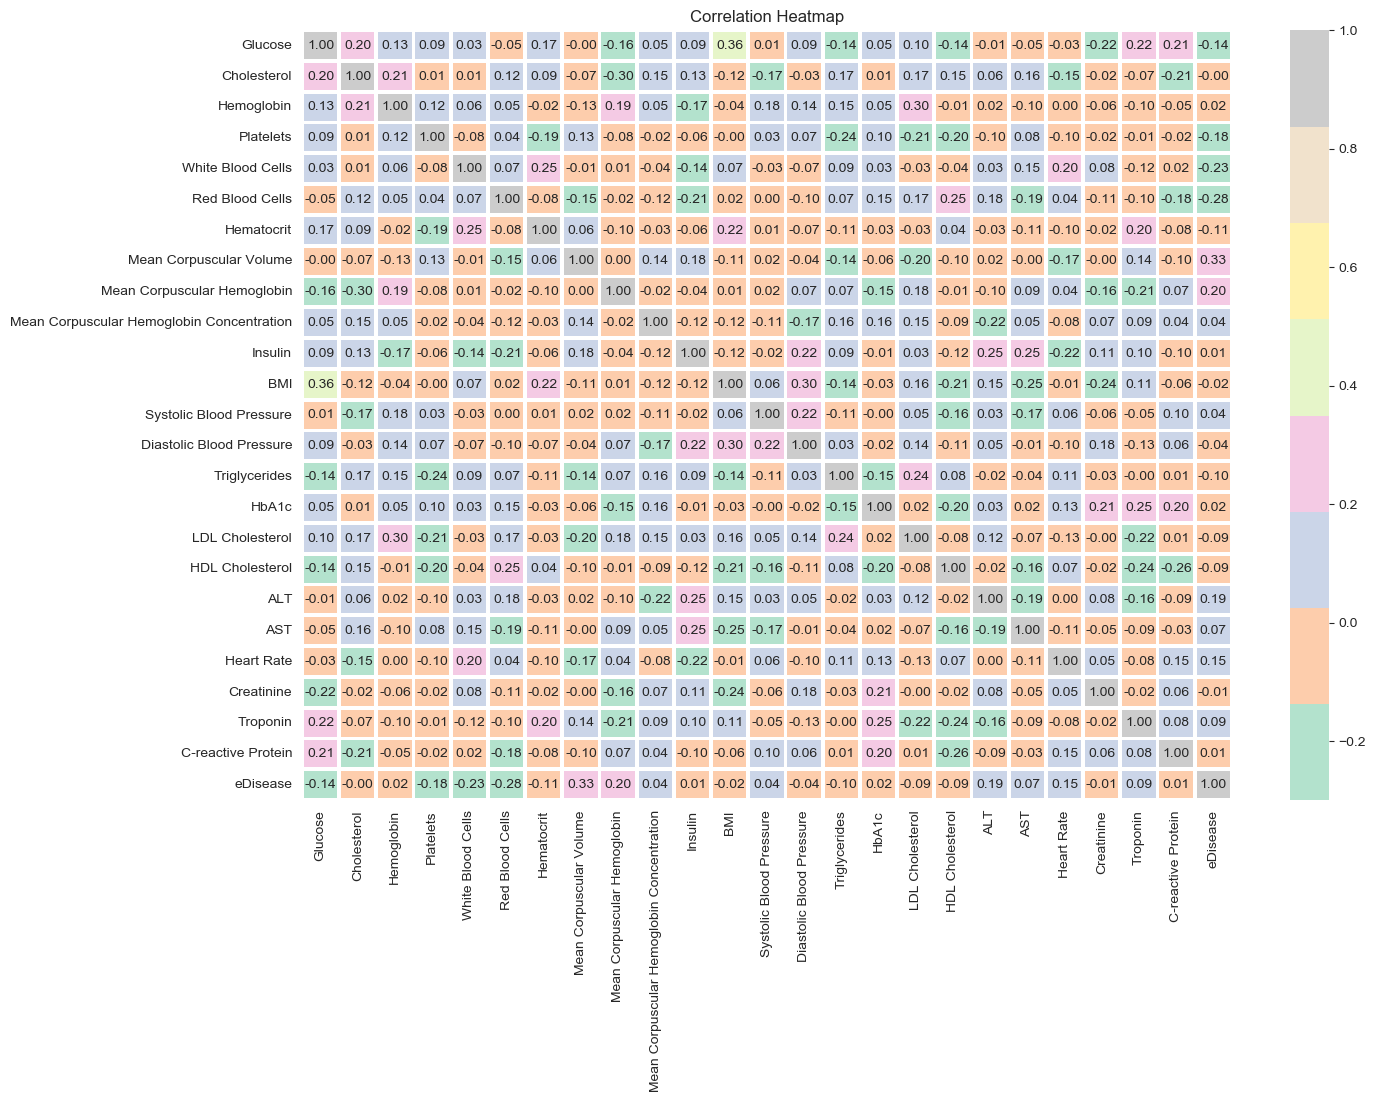

In [57]:


# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))

# Using Seaborn to create a heatmap
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

# Modeling 

In [58]:
x=df.drop(columns=['eDisease','Disease'])
y=df ['eDisease']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(x,y ,
                                   random_state=24,
                                   test_size=0.05,
                                   shuffle=True)

## SVM

In [60]:
from sklearn import svm
reg = svm.SVC().fit(X_train, y_train)

In [61]:
from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the model
y_predict=reg.predict(X_val)
accuracy = accuracy_score(y_val, y_predict)

In [62]:
print('accuracy:',accuracy*100)

accuracy: 100.0


In [63]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [64]:
df_test

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,eDisease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse,1
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes,1
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di,1
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes,1
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes,1
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di,1
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia,1
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes,1


In [65]:
x_t=df_test.drop(columns=['eDisease','Disease'])
y_t=df_test ['eDisease']

SVM
              precision    recall  f1-score   support

           0       0.07      0.40      0.11         5
           1       0.99      0.94      0.97       481

    accuracy                           0.94       486
   macro avg       0.53      0.67      0.54       486
weighted avg       0.98      0.94      0.96       486

accuracy: 93.62139917695474
Precision: 0.993
Recall: 0.942
F1 Score: 0.967


Text(0.5, 1, 'Confusion Matrix for  (SVM Model)')

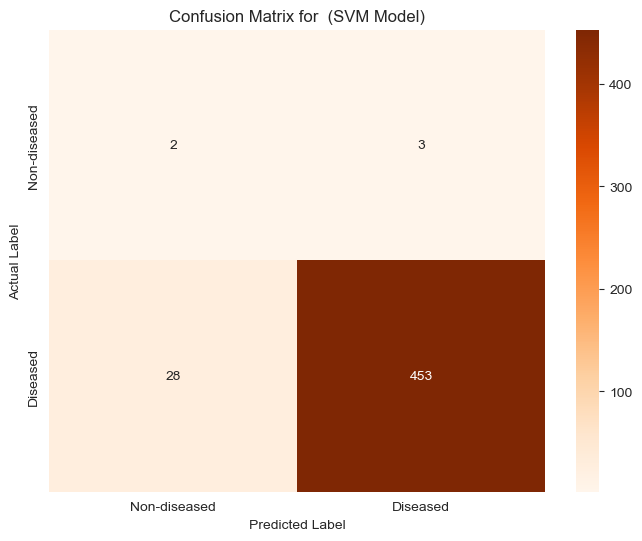

In [66]:
print("SVM")
y_pred=reg.predict(x_t)
accuracy = accuracy_score(y_t, y_pred)
print(classification_report(y_t, y_pred))
print('accuracy:',accuracy*100)
print('Precision: %.3f' % precision_score(y_t, y_pred))
print('Recall: %.3f' % recall_score(y_t, y_pred))
print('F1 Score: %.3f' % f1_score(y_t, y_pred))
# Construct the confusion matrix
conf_matrix = confusion_matrix(y_t, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Non-diseased','Diseased'], yticklabels=['Non-diseased','Diseased'])
# Adding labels and title
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for  (SVM Model)')

# #############

# ###########

## Logistic Regression && Elastic net

In [67]:
x=df.drop(columns=['eDisease','Disease'])
y=df ['eDisease']

In [68]:
df_test['eDisease'] = df_test['Disease'].apply(encode_value)
x_t=df_test.drop(['eDisease','Disease'],axis=1)
y_t=df_test['eDisease']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(x,y ,
                                   random_state=24,
                                   test_size=0.05,
                                   shuffle=True)

In [70]:
# Basic LogisticRegression algorithm
logistic_regression_classifier = LogisticRegressionCV(cv=5)

# Note, you should probably tune this, these values are arbitrary
elastic_net_classifier = LogisticRegressionCV(cv=5, penalty='elasticnet', l1_ratios=[0.03, 0.05, 0.09], solver='saga')

# Train the models
logistic_regression_classifier.fit(X_train, y_train)
elastic_net_classifier.fit(X_train, y_train)

# Test the models
print("Logistic Regression: {} || Elasticnet: {}".format(logistic_regression_classifier.score(X_val, y_val), elastic_net_classifier.score(X_val, y_val)))

# Print out some more metrics
print("Logistic Regression")
print(classification_report(y_val, logistic_regression_classifier.predict(X_val)))
print("Elastic Net")
print(classification_report(y_val, elastic_net_classifier.predict(X_val)))

c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

Logistic Regression: 1.0 || Elasticnet: 1.0
Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        89

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118

Elastic Net
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        89

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Logistic Regression
              precision    recall  f1-score   support

           0       0.03      0.80      0.05         5
           1       1.00      0.68      0.81       481

    accuracy                           0.68       486
   macro avg       0.51      0.74      0.43       486
weighted avg       0.99      0.68      0.80       486

accuracy: 67.90123456790124
Precision: 0.997
Recall: 0.678
F1 Score: 0.807


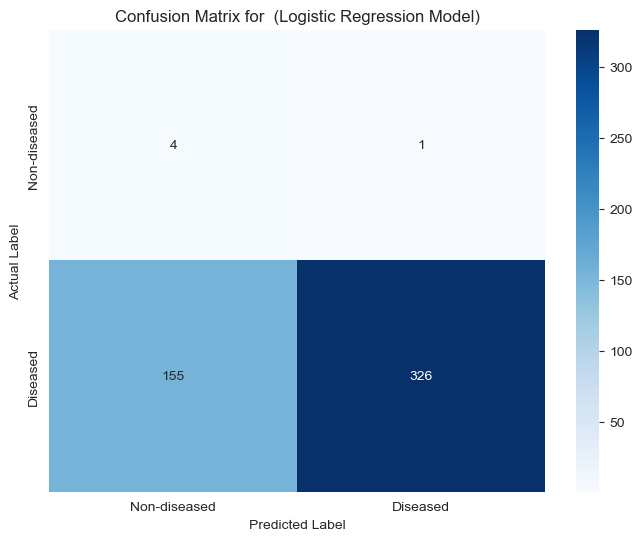

#######################################################
#######################################################
Elastic Net
              precision    recall  f1-score   support

           0       0.03      0.80      0.05         5
           1       1.00      0.68      0.81       481

    accuracy                           0.68       486
   macro avg       0.51      0.74      0.43       486
weighted avg       0.99      0.68      0.80       486

accuracy: 67.90123456790124
Precision: 0.997
Recall: 0.678
F1 Score: 0.807


Text(0.5, 1, 'Confusion Matrix for  (Elastic Net Model)')

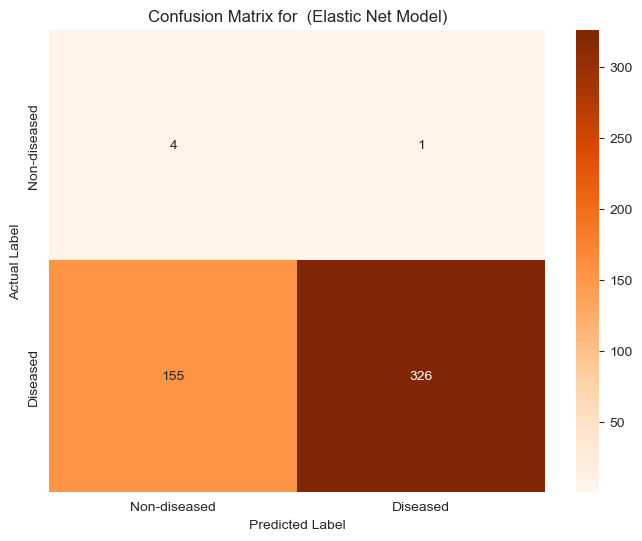

In [71]:
# Print out some more metrics


print("Logistic Regression")
y_pred=logistic_regression_classifier.predict(x_t)
accuracy = accuracy_score(y_t,y_pred)
print(classification_report(y_t, y_pred))
print('accuracy:',accuracy*100)
print('Precision: %.3f' % precision_score(y_t, y_pred))
print('Recall: %.3f' % recall_score(y_t, y_pred))
print('F1 Score: %.3f' % f1_score(y_t, y_pred))
# Construct the confusion matrix
conf_matrix = confusion_matrix(y_t, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Non-diseased','Diseased'], yticklabels=['Non-diseased','Diseased'])
# Adding labels and title
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for  (Logistic Regression Model)')
plt.show()
print("#######################################################")
print("#######################################################")
print("Elastic Net")
y_pred=elastic_net_classifier.predict(x_t)
accuracy = accuracy_score(y_t, y_pred)
print(classification_report(y_t, y_pred))
print('accuracy:',accuracy*100)
print('Precision: %.3f' % precision_score(y_t, y_pred))
print('Recall: %.3f' % recall_score(y_t, y_pred))
print('F1 Score: %.3f' % f1_score(y_t, y_pred))
# Construct the confusion matrix
conf_matrix = confusion_matrix(y_t, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Non-diseased','Diseased'], yticklabels=['Non-diseased','Diseased'])
# Adding labels and title
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for  (Elastic Net Model)')


## Random Forest

RandomForest
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        29
           1       0.77      1.00      0.87        89

    accuracy                           0.77       118
   macro avg       0.88      0.53      0.50       118
weighted avg       0.82      0.77      0.69       118

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      0.99       481

    accuracy                           0.99       486
   macro avg       0.49      0.50      0.50       486
weighted avg       0.98      0.99      0.98       486

accuracy: 98.97119341563786
Precision: 0.990
Recall: 1.000
F1 Score: 0.995


c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1, 'Confusion Matrix for  (RandomForest Model)')

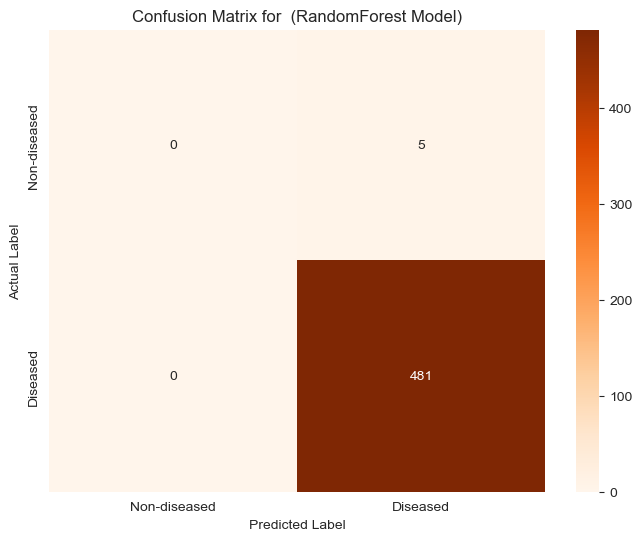

In [72]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
print("RandomForest")
print(classification_report(y_val, clf.predict(X_val)))



y_pred=clf.predict(x_t)
accuracy = accuracy_score(y_t, y_pred)
print(classification_report(y_t, y_pred))
print('accuracy:',accuracy*100)
print('Precision: %.3f' % precision_score(y_t, y_pred))
print('Recall: %.3f' % recall_score(y_t, y_pred))
print('F1 Score: %.3f' % f1_score(y_t, y_pred))
# Construct the confusion matrix
conf_matrix = confusion_matrix(y_t, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Non-diseased','Diseased'], yticklabels=['Non-diseased','Diseased'])
# Adding labels and title
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for  (RandomForest Model)')

Fitting 9 folds for each of 10 candidates, totalling 90 fits
Best Parameters: {'max_depth': 4}
Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        89

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118

Validation Accuracy: 1.0
Validation F1 Score: 1.0
Test Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.20      0.08         5
           1       0.99      0.96      0.98       481

    accuracy                           0.95       486
   macro avg       0.52      0.58      0.53       486
weighted avg       0.98      0.95      0.97       486

Test Accuracy: 0.9547325102880658
Test F1 Score: 0.9767932489451477


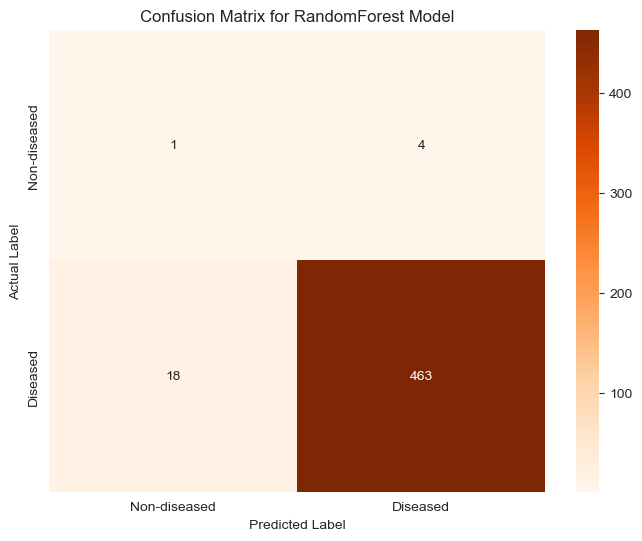

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [2,3, 4, 5, 6, 7, 8, 9, 10,15]  # You can adjust this range based on your requirement
}

# Initialize RandomForestClassifier
clf = RandomForestClassifier(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=9, scoring='f1', verbose=1, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Use the best estimator to predict on validation data
y_pred_val = best_estimator.predict(X_val)

# Print classification report for validation data
print("Validation Classification Report:")
print(classification_report(y_val, y_pred_val))

# Calculate and print accuracy for validation data
val_accuracy = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", val_accuracy)

# Calculate and print F1 score for validation data
val_f1_score = f1_score(y_val, y_pred_val)
print("Validation F1 Score:", val_f1_score)

# Use the best estimator to predict on test data (assuming x_t and y_t are your test data)
y_pred_test = best_estimator.predict(x_t)

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(y_t, y_pred_test))

# Calculate and print accuracy for test data
test_accuracy = accuracy_score(y_t, y_pred_test)
print("Test Accuracy:", test_accuracy)

# Calculate and print F1 score for test data
test_f1_score = f1_score(y_t, y_pred_test)
print("Test F1 Score:", test_f1_score)

# Construct the confusion matrix for test data
conf_matrix = confusion_matrix(y_t, y_pred_test)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges",
            xticklabels=['Non-diseased', 'Diseased'], yticklabels=['Non-diseased', 'Diseased'])
# Adding labels and title
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForest Model')

# Show plot
plt.show()


# Detect Disease Names

In [74]:
# Define a custom encoding function
def encode_value_Disease(value):
    # Define the list of values and their corresponding encodings
    value_encoding = {
        'Healthy': 0,
        'Diabetes': 1,
        'Thalasse': 2,
        'Anemia': 3,
        'Thromboc': 4
    }
    new_encoding = -1
    if value in value_encoding:
        return value_encoding[value]
    else:
        # If the value is not in the predefined list, assign a new encoding

        value_encoding[value] = new_encoding
        return new_encoding



In [75]:
df_new=df.drop(df[df.Disease =='Healthy'].index).copy()


In [76]:
df_new['eDisease'] = df_new['Disease'].apply(encode_value_Disease)

In [77]:
df_new

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease,eDisease
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes,1
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse,2
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia,3
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse,2
5,0.898222,0.258706,0.933307,0.353082,0.373952,0.297138,0.900010,0.985488,0.679007,0.355774,...,0.529914,0.222687,0.772461,0.119994,0.894273,0.128124,0.379016,0.751438,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,0.012956,0.336925,0.451218,0.175006,0.734664,0.382770,0.656463,0.177502,0.808162,0.684499,...,0.311568,0.595083,0.155866,0.885812,0.636125,0.132226,0.716519,0.006121,Diabetes,1
2347,0.407101,0.124738,0.983306,0.663867,0.361113,0.663716,0.232516,0.341056,0.847441,0.309766,...,0.701914,0.218104,0.790341,0.570902,0.339125,0.310964,0.310900,0.622403,Thalasse,2
2348,0.344356,0.783918,0.582171,0.996841,0.065363,0.242885,0.658851,0.543017,0.290106,0.838722,...,0.155871,0.473638,0.250535,0.387197,0.344728,0.606719,0.395145,0.134021,Anemia,3
2349,0.351722,0.014278,0.898615,0.167550,0.727148,0.046091,0.900434,0.136227,0.134361,0.279219,...,0.171245,0.858352,0.362012,0.290984,0.996873,0.882164,0.411158,0.146255,Diabetes,1


In [78]:
x=df_new.drop(columns=['eDisease','Disease'])
y=df_new ['eDisease']

## SVM

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(x,y ,
                                   random_state=24,
                                   test_size=0.05,
                                   shuffle=True)

In [80]:

from sklearn import svm
reg_Disease = svm.SVC().fit(X_train, y_train)
from sklearn.metrics import accuracy_score
# Evaluate the accuracy of the model
y_predict=reg_Disease.predict(X_val)
accuracy = accuracy_score(y_val, y_predict)
print(accuracy)


1.0


In [81]:
df_test['eDisease'] = df_test['Disease'].apply(encode_value_Disease)

In [82]:
x_t=df_test.drop(['eDisease','Disease'],axis=1)
y_t=df_test['eDisease']

In [83]:

import numpy as np

y_pred = []
for index, row in x_t.iterrows():
    row_array = np.array(row).reshape(1, -1)  # Reshape to 1 sample with multiple features
    perd = reg.predict(row_array)

    if perd == 1:
        perd = reg_Disease.predict(row_array)

    y_pred.append(perd)


c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not h

c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        39
           0       0.07      0.40      0.11         5
           1       0.71      0.67      0.69       294
           2       0.21      0.40      0.28        48
           3       0.40      0.40      0.40        84
           4       0.00      0.00      0.00        16

    accuracy                           0.52       486
   macro avg       0.23      0.31      0.25       486
weighted avg       0.52      0.52      0.51       486

accuracy: 52.05761316872428


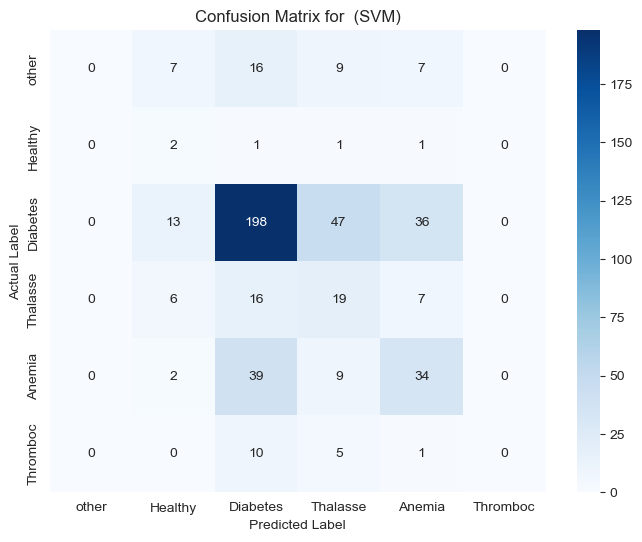

In [84]:
accuracy = accuracy_score(y_t,y_pred)
print(classification_report(y_t, y_pred))
print('accuracy:',accuracy*100)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_t, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['other','Healthy','Diabetes','Thalasse', 'Anemia','Thromboc'], yticklabels=['other','Healthy','Diabetes','Thalasse', 'Anemia','Thromboc'])
# Adding labels and title
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for  (SVM)')
plt.show()


## RandomForest

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_val,y_train, y_val = train_test_split(x,y ,
                                   random_state=24,
                                   test_size=0.05,
                                   shuffle=True)

In [86]:
from sklearn.ensemble import RandomForestClassifier

clf_Disease = RandomForestClassifier(max_depth=2, random_state=0)
clf_Disease.fit(X_train, y_train)
print("RandomForest")
print(classification_report(y_val, clf_Disease.predict(X_val)))

accuracy = accuracy_score(y_val,clf_Disease.predict(X_val))
print('accuracy:',accuracy*100)




RandomForest
              precision    recall  f1-score   support

           1       1.00      0.73      0.85        30
           2       0.76      1.00      0.86        22
           3       0.77      1.00      0.87        30
           4       0.00      0.00      0.00         8

    accuracy                           0.82        90
   macro avg       0.63      0.68      0.64        90
weighted avg       0.78      0.82      0.78        90

accuracy: 82.22222222222221


c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
y_pred = []
for index, row in x_t.iterrows():
    row_array = np.array(row).reshape(1, -1)  # Reshape to 1 sample with multiple features
    perd = best_estimator.predict(row_array)

    if perd == 1:
        perd = clf_Disease.predict(row_array)

    y_pred.append(perd)


c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\base.py:451: UserWarning: X does not hav

c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asdcx\anaconda3\envs\gpu\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        39
           0       0.05      0.20      0.08         5
           1       0.63      0.63      0.63       294
           2       0.24      0.25      0.24        48
           3       0.33      0.49      0.40        84
           4       0.00      0.00      0.00        16

    accuracy                           0.49       486
   macro avg       0.21      0.26      0.23       486
weighted avg       0.46      0.49      0.48       486

accuracy: 49.382716049382715


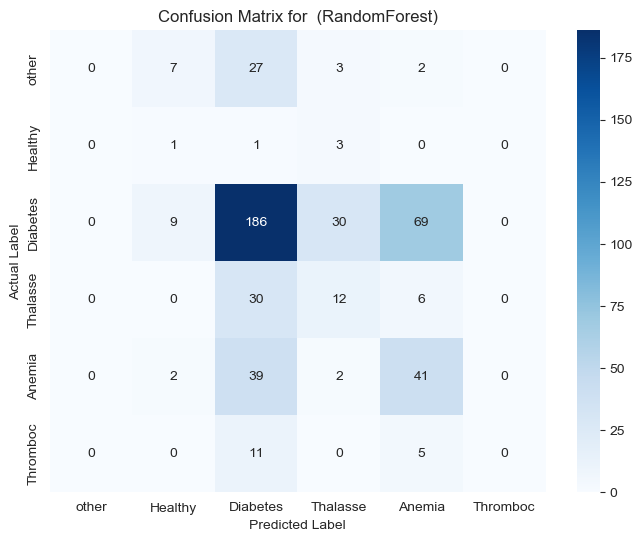

In [90]:
accuracy = accuracy_score(y_t,y_pred)
print(classification_report(y_t, y_pred))
print('accuracy:',accuracy*100)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_t, y_pred)
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['other','Healthy','Diabetes','Thalasse', 'Anemia','Thromboc'], yticklabels=['other','Healthy','Diabetes','Thalasse', 'Anemia','Thromboc'])
# Adding labels and title
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for  (RandomForest)')
plt.show()
